In [202]:
# Import Necessary Libraries

from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform

In [141]:

# Loading the Dataset 
california = fetch_california_housing()

# Create a Dataframe from the dataset 
cal = pd.DataFrame(california.data,columns=california.feature_names)

# adding the target variable 
cal['MedHouseValue'] = california.target

# getting the first 5 rows
cal.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [142]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [143]:
cal.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [144]:
cal.duplicated().sum()

0

## Distribution of Target Variable

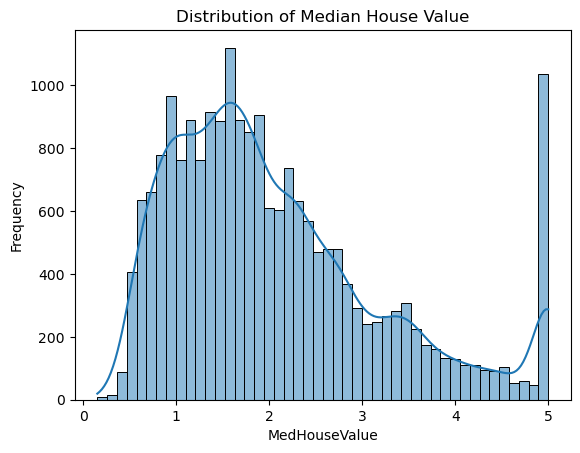

In [146]:
sns.histplot(cal['MedHouseValue'],kde=True)
plt.title("Distribution of Median House Value")
plt.ylabel("Frequency")
plt.show()

## Correaltion Heatmap

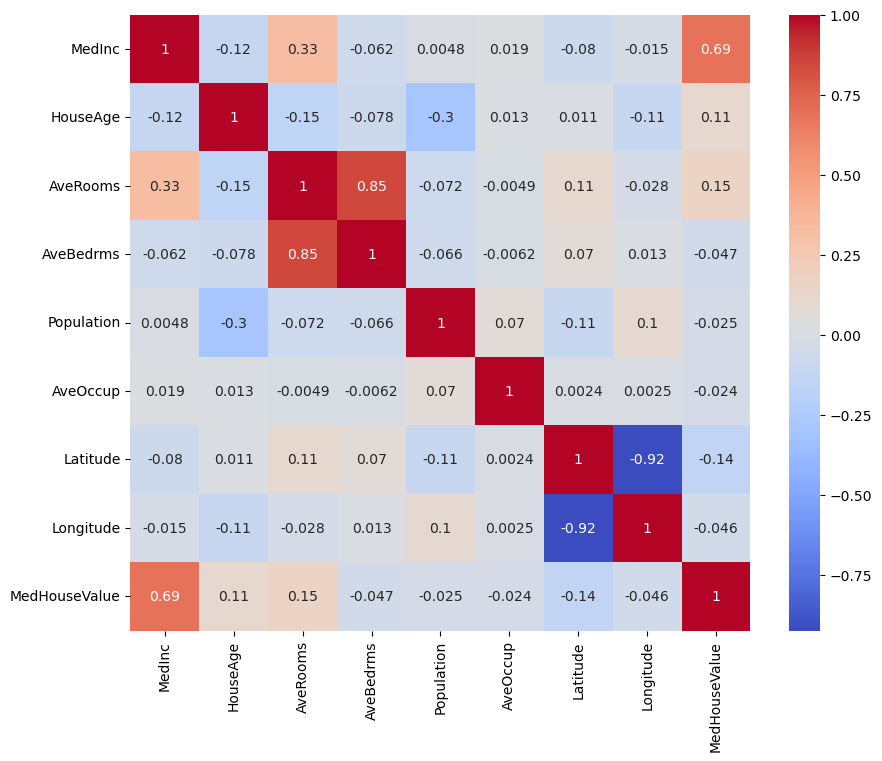

In [148]:
correlation_matrix = cal.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.show()

## Box Plot Using  various Features

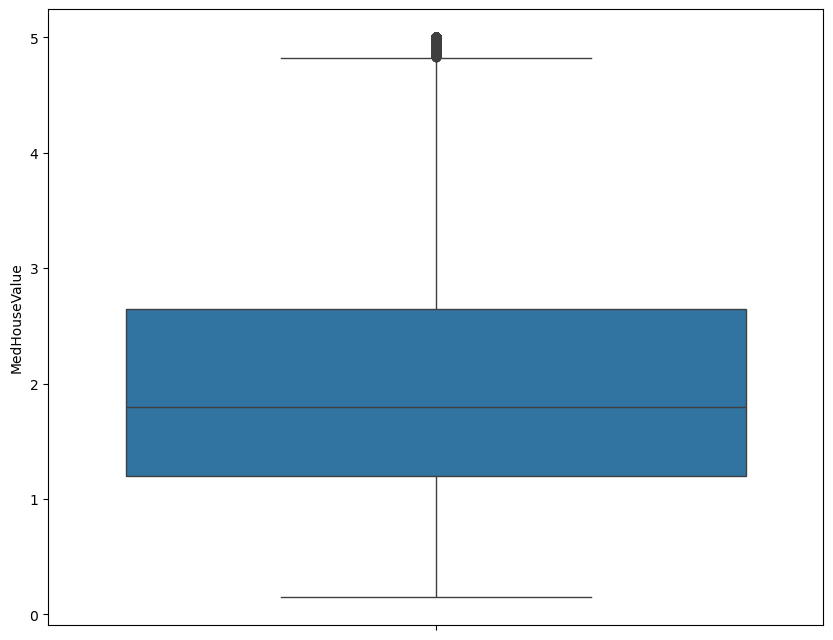

In [150]:
plt.figure(figsize=(10,8))
sns.boxplot(y='MedHouseValue',data=cal)
plt.show()

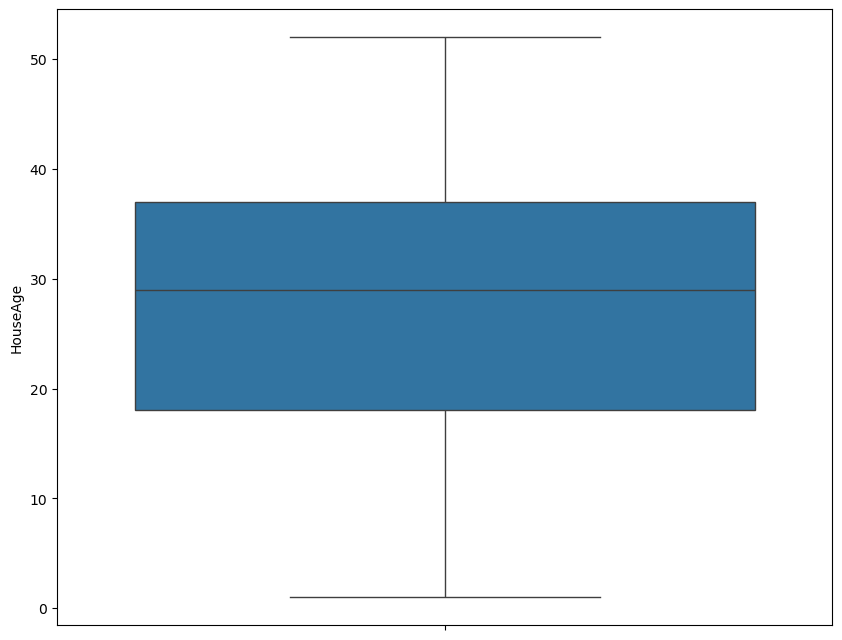

In [151]:
plt.figure(figsize=(10,8))
sns.boxplot(y='HouseAge',data=cal)
plt.show()

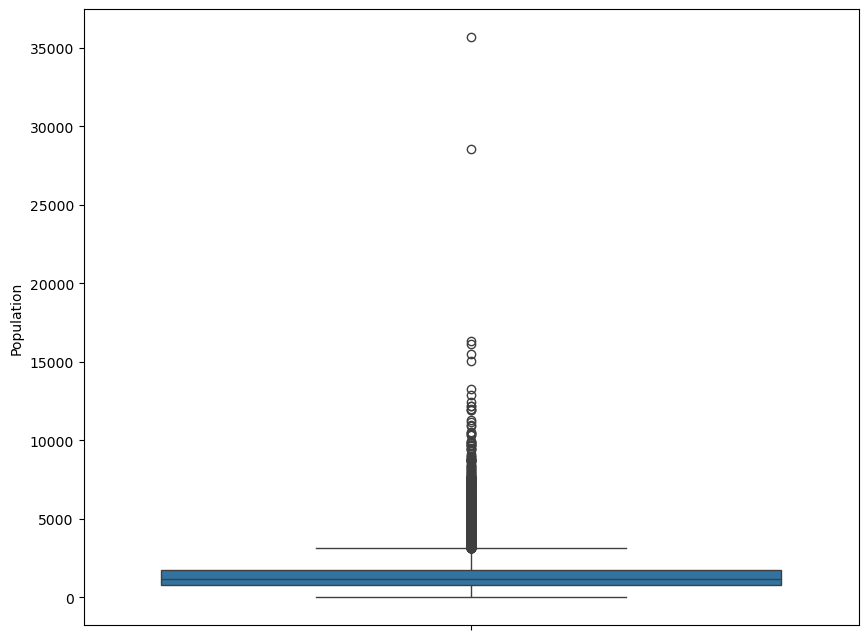

In [152]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Population',data=cal)
plt.show()

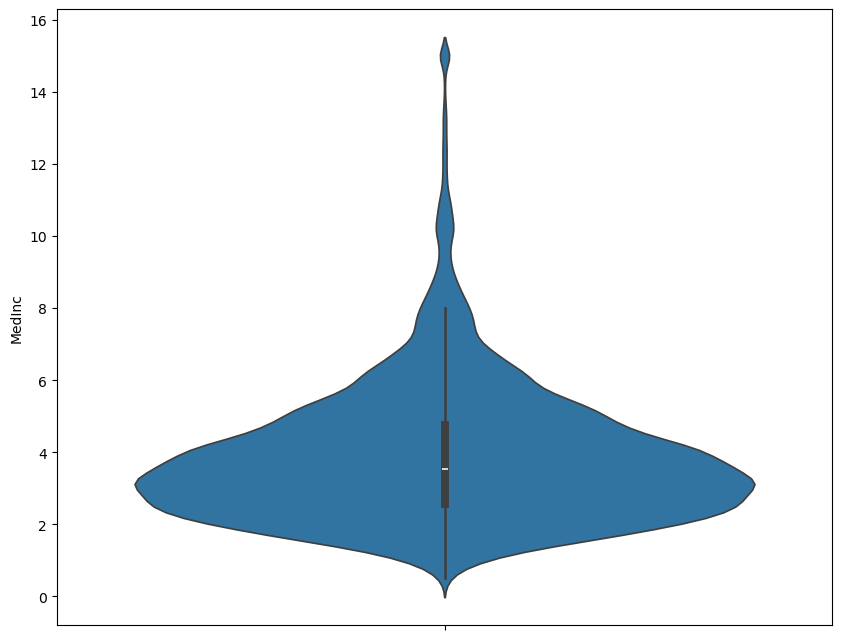

In [153]:
plt.figure(figsize=(10,8))
sns.violinplot(y='MedInc' ,data=cal)
plt.show()

## Regression Plot 

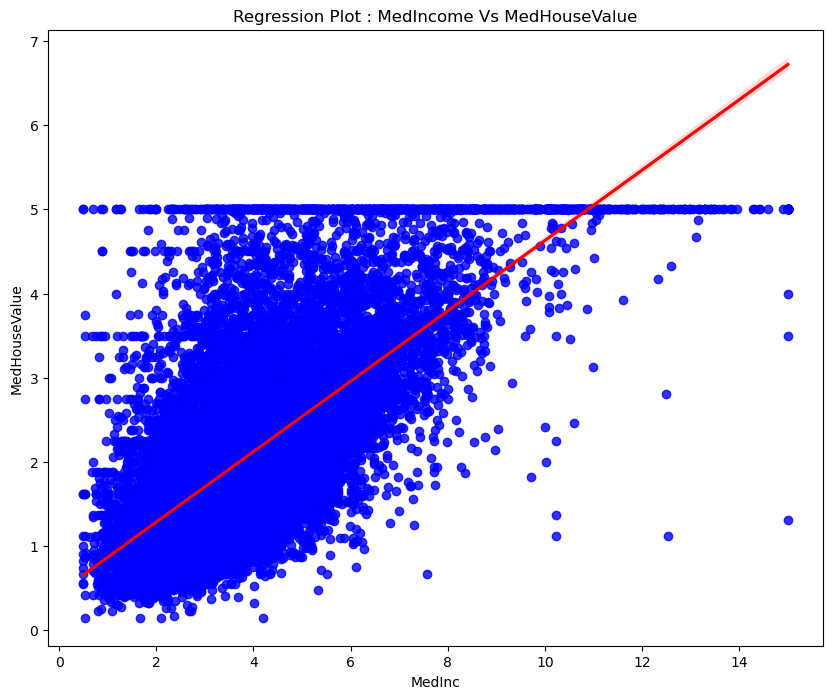

In [155]:
plt.figure(figsize=(10,8))
sns.regplot(x='MedInc',y='MedHouseValue',data=cal,
            scatter_kws={'color':'blue'},
            line_kws={'color':'red'})
plt.title("Regression Plot : MedIncome Vs MedHouseValue")
plt.show()

## Pair Plot

#### To visualize the realtionships between multiple variables and target variables at once 

<Figure size 1000x800 with 0 Axes>

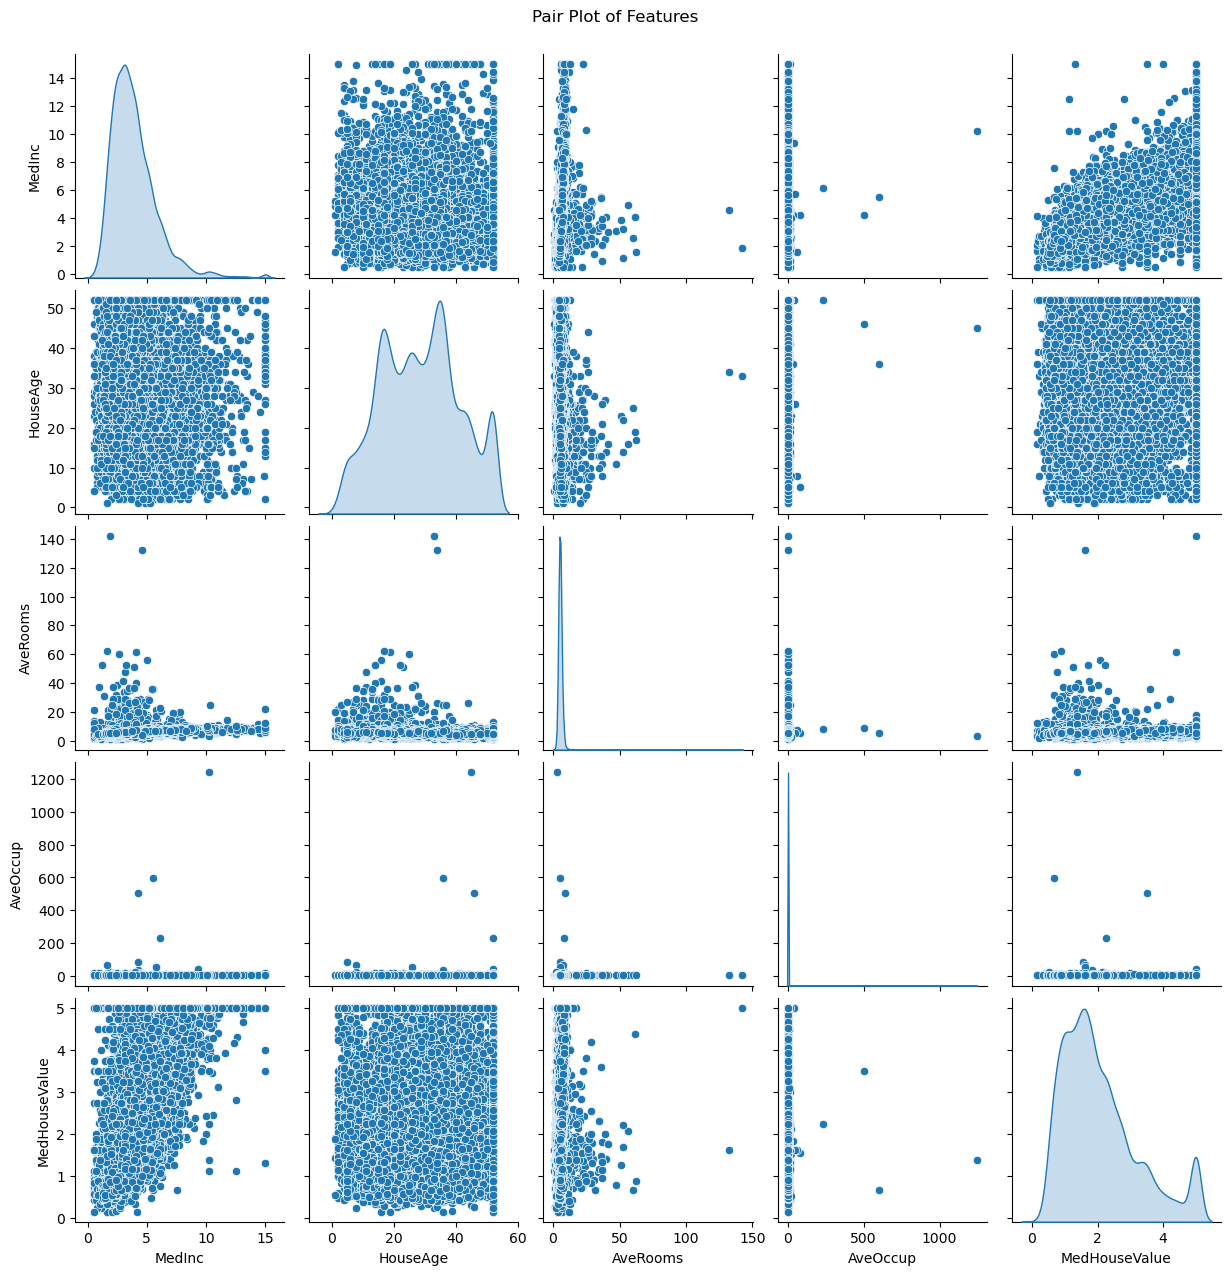

In [158]:
plt.figure(figsize=(10,8))
sns.pairplot(cal[['MedInc','HouseAge','AveRooms',
                 'AveOccup','MedHouseValue']],
             diag_kind = 'kde')
plt.suptitle('Pair Plot of Features',y=1.02)
plt.show()

## Linear Regression Model 

In [175]:
# Defining X and Y variable 

# Features
X = cal.drop(columns='MedHouseValue',axis=1)

# Target Variable
y = cal['MedHouseValue']

# Splitting the data using Train Test Split 
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Intializing the LinearRegression Model 
lr = LinearRegression()

# Training the Model on the training data
lr.fit(X_train,y_train)

# Make Pridiction on the test data 
y_pred_lr = lr.predict(X_test)

# Evaluating the Model Using MeanSquaredError & R2 score Error 
mse = mean_squared_error(y_test,y_pred_lr)
r2 = r2_score(y_test,y_pred_lr)*100

print(f"Mean Squared Error : {mse}")
print(f"R2 Score : {r2}")

Mean Squared Error : 0.52500948616216
R2 Score : 59.640257391571


## Decision Tree

In [183]:
# Intializing the Decision Tree
dt = DecisionTreeRegressor()

# Training the Model on the training data
dt.fit(X_train,y_train)

# Make prediction on the test data
y_pred_dt = dt.predict(X_test)

# Evaluating the Model Using MeanSquaredError & R2 score Error 
mse_dt = mean_squared_error(y_test,y_pred_dt)
r2_dt = r2_score(y_test,y_pred_dt)*100

print(f"Mean Squared Error : {mse_dt}")
print(f"R2 Score : {r2_dt}")

Mean Squared Error : 0.5368042225767199
R2 Score : 58.73354515422513


## Random Forest Regressor

In [185]:
# Intializing the Random Forest
rf = RandomForestRegressor()

# Training the Model on the training data
rf.fit(X_train,y_train)

# Make prediction on the test data
y_pred_rf = rf.predict(X_test)

# Evaluating the Model Using MeanSquaredError & R2 score Error 
mse_rf = mean_squared_error(y_test,y_pred_rf)
r2_rf = r2_score(y_test,y_pred_rf)*100

print(f"Mean Squared Error : {mse_rf}")
print(f"R2 Score : {r2_rf}")

Mean Squared Error : 0.25353892150945645
R2 Score : 80.5093700532113


## Hyper Parameter Tuning 

In [ ]:

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': uniform(0.1, 0.9)
}
random_search = RandomizedSearchCV(estimator=rf,param_distributions = param_dist ,n_iter = 100,cv=4,random_state=42)

# Fit the Model 
random_search.fit(X_train,y_train)

# Getting Best Parameters 
best_parameters = random_search.best_params_

# Train the Random Forest Model using best params
best_rf_model = RandomForestRegressor(**best_parameters)
best_rf_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
